In [1]:
import os
import re 
import random
import string      # for string operations    
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# SetUp NLTK
!pip install --user -U nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████| 4.38M/4.38M [00:02<00:00, 2.12MB/s]

Extracting files...


Path to dataset files: /Users/nrkhanchowdhury/.cache/kagglehub/datasets/datatattle/covid-19-nlp-text-classification/versions/1


In [12]:
dataframe = pd.read_csv("./Desktop/Corona_NLP_train.csv", encoding="utf-8", encoding_errors="replace")
print(dataframe.shape)
dataframe.head(10)

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


Labels in the dataset:  ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


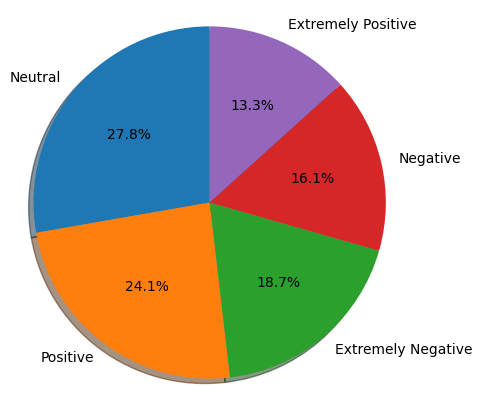

In [13]:
# Check tweets distribution 
def pie_chart(dataframe):
  # Converting pd object to list of string
  label_types  = dataframe.Sentiment.unique().astype(str) 
  # Count tweets for each label
  label_counts = dataframe.Sentiment.value_counts()     
  print('Labels in the dataset: ', label_types) 
  print(label_counts)
  # labels for the two classes
  labels = label_types #'Positives', 'Negative'
  # Sizes for each slide
  sizes = [count for count in label_counts]
  # Declare a figure with a custom size
  fig = plt.figure(figsize=(5, 5))
  # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
  plt.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.axis('equal') 
  # Display the chart
  plt.show()

pie_chart(dataframe)

In [17]:
dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].shape

(11422, 6)

In [18]:
df_test = pd.read_csv("./Desktop/Corona_NLP_test.csv", encoding="utf-8", encoding_errors="replace")
print(df_test.shape)
df_test.head(10)

(3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


Labels in the dataset:  ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']
Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64


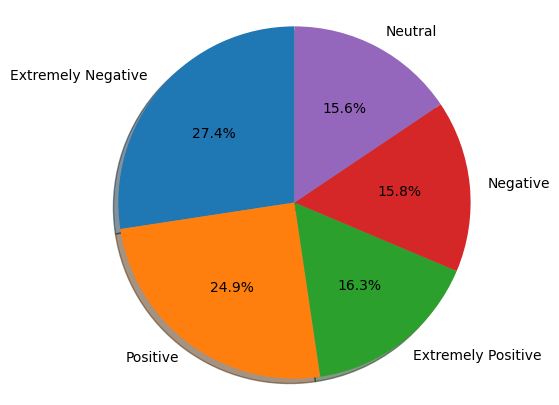

In [19]:
# Check tweets distribution 
def pie_chart(df_test):
  # Converting pd object to list of string
  label_types  = df_test.Sentiment.unique().astype(str) 
  # Count tweets for each label
  label_counts = df_test.Sentiment.value_counts()     
  print('Labels in the dataset: ', label_types) 
  print(label_counts)
  # labels for the two classes
  labels = label_types #'Positives', 'Negative'
  # Sizes for each slide
  sizes = [count for count in label_counts]
  # Declare a figure with a custom size
  fig = plt.figure(figsize=(5, 5))
  # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
  plt.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.axis('equal') 
  # Display the chart
  plt.show()

pie_chart(df_test)

## Split into +ve and -ve 

In [63]:
# Separating positive_tweets and negative_tweets
positive_train = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))[:9917] # Making equal positive and negative tweet counts
negative_train = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))

# Splitting training and testing set. 80/20 split
positive_test = list(df_test[df_test['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))
negative_test = list(df_test[df_test['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]

print("Size of training dataset: ",len(positive_train) + len(negative_train))
print("Size of testing dataset: ", len(positive_test)  + len(negative_test))

# print positive in green
print('\033[92m' + '\npositive in green: ')
print('\033[92m' + positive_train[random.randint(0,947)])
print('\033[91m' + '\nnegative in red: ')
# print negative in red
print('\033[91m' + negative_train[random.randint(0,947)])

Size of training dataset:  19834
Size of testing dataset:  1894

positive in green: 
Self-quarantine = online shopping...I hope the banks are open after all this settles down because I may need a small personal loan...TO MYSELF #SOS #Covid_19 ?

negative in red: 
There is plenty of food. Plenty of TP. Plenty of alcohol. The reason there are shortages is because of panic buying. Italy is a few weeks ahead of us in spread and lockdown but the groceries are full and everyone has everything they need, except for hospital beds. #coronavirus


### Word tokenization: split large text samples into words. 

In [22]:
# Split on spaces
tweet = positive_train[12] 
word = tweet.split() # space tokenizer
print('Using Split :',word)

Using Split : ['Now', 'I', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged!', '?', '#CoronavirusOutbreak', '#COVID2019', 'https://t.co/krTCGiUHQS']


In [23]:
# Using 're' library to work with regular expression.
tokens = re.findall("[\w']+", tweet)  ##\w -> .Python 3: "word character":
print('Using regexes :',tokens)

Using regexes : ['Now', 'I', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', 'CoronavirusOutbreak', 'COVID2019', 'https', 't', 'co', 'krTCGiUHQS']


### NLTK contains a module called `tokenize`, which has the `word_tokenize()` method to split a sentence into tokens.

In [26]:
from nltk.tokenize import word_tokenize

words = word_tokenize(tweet)
print('Using NLTK :',words)

Using NLTK : ['Now', 'I', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', '#', 'CoronavirusOutbreak', '#', 'COVID2019', 'https', ':', '//t.co/krTCGiUHQS']


In [27]:
# Splits at '.' 
splits = tweet.split('. ')
print('Using Splits :',splits)

# Using Regular Expressions (RegEx)
sentence_splits = re.compile('[.!?] ').split(tweet)
print('Using regexes :',sentence_splits)

Using Splits : ['Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS']
Using regexes : ['Now I can go to the supermarket like this without being judged', '', '#CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS']


In [28]:
# Using NLTK
from nltk.tokenize import sent_tokenize
sentence_splits = sent_tokenize(tweet)
print('Using NLTK :',sentence_splits)

Using NLTK : ['Now I can go to the supermarket like this without being judged!', '?', '#CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS']


In [29]:
tweet

'Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS'

In [30]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # tweeter specifci tokenizer

In [31]:
# Removing hyperlinks and hashtags

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS

Now I can go to the supermarket like this without being judged! ? CoronavirusOutbreak COVID2019 


In [32]:
# Tokenizing

print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Now I can go to the supermarket like this without being judged! ? CoronavirusOutbreak COVID2019 


Tokenized string:
['now', 'i', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', 'coronavirusoutbreak', 'covid', '2019']


In [33]:
# Import the english stop words list from NLTK
nltk.download("stopwords")
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nrkhanchowdhury/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['now', 'i', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', 'coronavirusoutbreak', 'covid', '2019']

removed stop words and punctuation:
['go', 'supermarket', 'like', 'without', 'judged', 'coronavirusoutbreak', 'covid', '2019']


Stemming & Lemmatization are different word normalization techniques, that helps us convert the inflection words into the base forms. 

For example -



> *have, having, had      --> have*

> *playing, plays, played --> play*

> *good, better, best     --> good*

In [35]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['go', 'supermarket', 'like', 'without', 'judged', 'coronavirusoutbreak', 'covid', '2019']

stemmed words:
['go', 'supermarket', 'like', 'without', 'judg', 'coronavirusoutbreak', 'covid', '2019']


### Putting everything together




1.   Remove hyperlinks, hashtags etc.
2.   Tokenizing
3.   Remove stopwords and punctuation
4.   Stemming


In [36]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [64]:
# choose the same tweet
tweet = positive_train[12] 

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS

preprocessed tweet:
['go', 'supermarket', 'like', 'without', 'judg', 'coronavirusoutbreak', 'covid', '2019']


*  Previously, the word vector was of dimension `V` (size of vocabulary). Now, we will represent it with a vector of dimension `3`

*  To do so, create a dictionary to map the word, and the class it appeared in (positive or negative) to the number of times that word appeared in its corresponding class.

*  We call this dictionary `freqs`

*  ```feature vector of a tweet m = [ Bias, sum of positive frequency, sum of negative frequency]```

Frequency Dictionary:

Text represented as a vector of dimension 3.

In [67]:
def build_freqs(tweets, ys):
    """
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
        freqs: a dictionary mapping each (word, sentiment) pair (=key) to its frequency (=value)
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [72]:
training_tweets = positive_train + negative_train
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(positive_train))), np.zeros((len(negative_train))))

In [74]:
# create frequency dictionary
freqs = {}
freqs = build_freqs(training_tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 32128


In [75]:
# select some words to appear in the report.
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['void', 2, 2],
 ['commun', 219, 126],
 ['spirit', 23, 10],
 ['stop', 214, 423],
 ['merri', 0, 0],
 ['nice', 54, 26],
 ['good', 421, 251],
 ['bad', 37, 79],
 ['sad', 15, 28],
 ['mad', 12, 51],
 ['best', 82, 17],
 ['pretti', 41, 18],
 [':)', 6, 5],
 [':(', 4, 2],
 ['song', 11, 6],
 ['idea', 75, 47],
 ['power', 52, 43],
 ['play', 73, 42]]

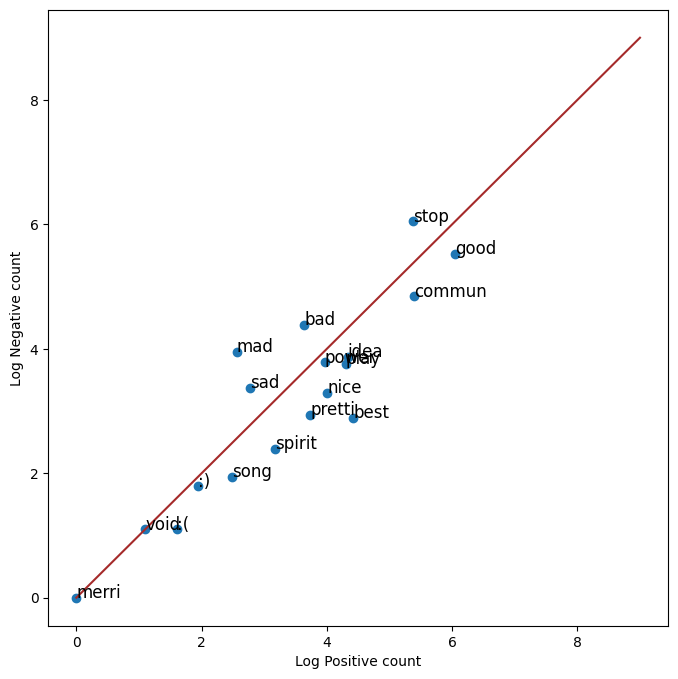

In [76]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'brown') # Plot the red line that divides the 2 areas.
plt.show()

### Extracting features function.

In [77]:
def extract_features(tweet, freqs):
    '''
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
        
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    assert(x.shape == (1, 3))
    return x

### Example 1: feature extraction for a tweet

In [82]:
train_x = training_tweets
tmp1 = extract_features(train_x[0], freqs)
print('preprocessed tweet:')
print(train_x[0],"\n")

print('extracted features:')
print(tmp1)

preprocessed tweet:
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order 

extracted features:
[[1.000e+00 4.524e+03 3.881e+03]]


In [83]:
tmp2 = extract_features('This batch is the best batch', freqs)
print(tmp2)

[[ 1. 92. 23.]]


### Preparing training data

In [84]:
# collect the features 'x' and stack them into a matrix 'X'
# train_x = training_tweets = positive_train + negatve_train

X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y,order='C')

## Implement the most basic logistic regression model

In [85]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.6216093576686498


### Check performance on test set

In [86]:
# Testing
testing_tweets = positive_test + negative_test

test_X = np.zeros((len(testing_tweets), 3))
for i in range(len(testing_tweets)):
    test_X[i, :]= extract_features(testing_tweets[i], freqs)

# training labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_Y = np.ravel(test_y,order='C')

print("Testing Accuracy: ",clf.score(test_X, test_Y))

Testing Accuracy:  0.5834213305174234


### Predict whether a tweet is positive or negative.

**Note:** classify 1, for a positive sentiment, and 0, for a negative sentiment.

In [87]:
def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)
    return y_pred

# test your function
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over', 
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding', 
                  '\033[92m'+'Government efforts are great.', 
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus', 
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 1.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 0.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000


/var/folders/21/vgybxt6529g5wrtxj6dvczdm0000gn/T/ipykernel_10578/2171738830.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))
/var/folders/21/vgybxt6529g5wrtxj6dvczdm0000gn/T/ipykernel_10578/2171738830.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))
/var/folders/21/vgybxt6529g5wrtxj6dvczdm0000gn/T/ipykernel_10578/2171738830.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfor

## Conclusion

**Aim:** To utilize Twitter feed to carry out the sentimental analysis on the new strain of COVID-19.

**Made machine understand textual data**

*   Tokenization
*   Regular expression
*   Natural Language Toolkit (NLTK) package

*   Preprocessing:
> 1.   Remove hyperlinks, hashtags etc.
> 2.   Remove stopwords and punctuation
> 3.   Stemming


*   Represent text in NLP:
> 1.   Sparse representation
> 2.   Drawbacks of sparse representation
> 3.   Frequency Dictionary
> 4.   Extracting features from Frequency Dictionary

*   Training Logistic Regression.
*   Performance on the test set
